In [1]:
from pathlib import Path
from datetime import datetime

import torch
import torchvision

from src.cwgan.models import Generator, Discriminator
from src.cwgan.trainer import Trainer

In [2]:
img_shape = (3, 227, 227)
num_classes = 11
embedding_dim = 11

gan_trainer = Trainer(img_shape, num_classes, embedding_dim, device="cuda")
gan_trainer.generator.load_state_dict(torch.load("../models/cWGAN/20210129211049/generator_50.pt"))
gan_trainer.discriminator.load_state_dict(torch.load("../models/cWGAN/20210129211049/discriminator_50.pt"))

<All keys matched successfully>

In [3]:
data_dir = Path('../data/CCSN_v2')
transform = torchvision.transforms.Compose(
    [torchvision.transforms.Resize(227),
     torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize(mean=0.5, std=0.5)]
)
batch_size = 32
num_workers = 0

train_dataset = torchvision.datasets.ImageFolder(data_dir, transform, target_transform=None)
data_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers
)

In [4]:
now = datetime.now().strftime("%Y%m%d%H%M%S")
epochs = 150
saved_image_directory = Path(f'../logs/cWGAN/{now}')
saved_model_directory = Path(f'../models/cWGAN/{now}')
save_model_every_epoch = 10
train_gen_every_batch = 3

history = gan_trainer.train(
    data_loader, epochs, saved_image_directory, saved_model_directory,
    save_model_every_epoch=save_model_every_epoch,
    train_gen_every_batch=train_gen_every_batch
)

9623 hours remaining
Epoch 8/150,    Gen Loss: -12.7843,   Dis Loss: 19.6822,   Was Loss: -46.6240
Time Taken: 25.3550 seconds. Estimated 1.0001 hours remaining
Epoch 9/150,    Gen Loss: 9.2919,   Dis Loss: -0.4067,   Was Loss: -29.2103
Time Taken: 24.5069 seconds. Estimated 0.9599 hours remaining
Epoch 10/150,    Gen Loss: 5.0630,   Dis Loss: 9.1655,   Was Loss: -33.7070
Time Taken: 24.2790 seconds. Estimated 0.9442 hours remaining
Epoch 11/150,    Gen Loss: -9.4963,   Dis Loss: 27.7083,   Was Loss: -36.1658
Time Taken: 24.4840 seconds. Estimated 0.9454 hours remaining
Epoch 12/150,    Gen Loss: -2.6969,   Dis Loss: 10.9699,   Was Loss: 20.4037
Time Taken: 24.8319 seconds. Estimated 0.9519 hours remaining
Epoch 13/150,    Gen Loss: 3.0287,   Dis Loss: 6.6423,   Was Loss: -65.8919
Time Taken: 24.7146 seconds. Estimated 0.9405 hours remaining
Epoch 14/150,    Gen Loss: 6.8189,   Dis Loss: 8.9290,   Was Loss: -19.8919
Time Taken: 24.5427 seconds. Estimated 0.9272 hours remaining
Epoch 15

Label for each column:
 ['Ac', 'As', 'Cb', 'Cc', 'Ci', 'Cs', 'Ct', 'Cu', 'Ns', 'Sc', 'St']


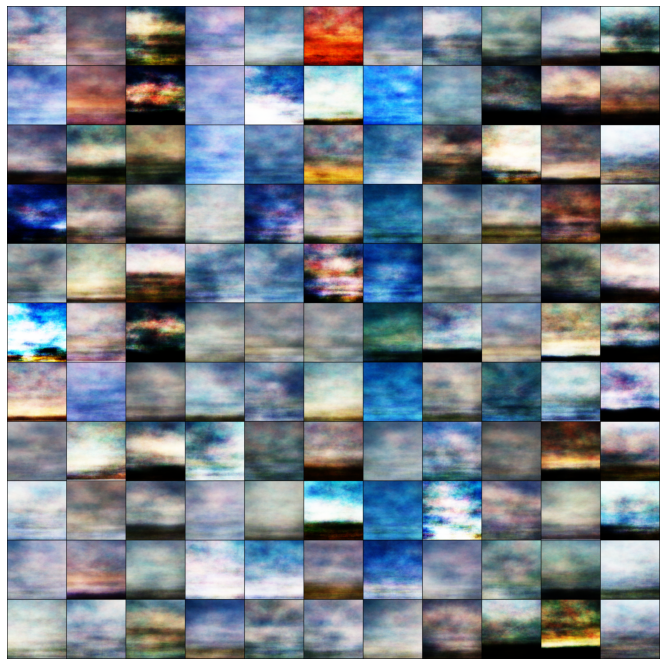

In [5]:
print("Label for each column:\n", train_dataset.classes)
gan_trainer.show_sample_image()